In [1]:
# We use the NLP tools to pre-process the dataset before it is proceeded to the feature selection and training stage. 
# First, we use tokenization to divide the posts into individual tokens.
# Next, we remove all the URLs, punctuations and stop words which could lead into erratic results if stay ignored. 
# Then we apply stemming in order to reduce the words to their root form and group similar words together.

In [2]:
import os
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import bigrams, trigrams

import re, string
import contractions

import itertools
import collections
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from wordcloud import WordCloud

import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/athinnyun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/athinnyun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
stopwords_set = stopwords.words("english")
# add_custom = ["add new words"]

In [4]:
dep_data_path = "./Identifying-depression/Data_Collector/reddit_depression/"
non_dep_data_path = "./Identifying-depression/Data_Collector/reddit_non_depression/"

dep_txt_list = os.listdir(dep_data_path)
non_dep_txt_list = os.listdir(non_dep_data_path)

In [5]:
porter = PorterStemmer()
stemming = False #reduce the words to their root form

def sentence_preprocess(sentence):

    """""""""""""""""""""""""""
    Decontract the words in given sentence, and remove stopwords, URLs, and punctuations
    Also, reduce the words to their root form, if applicable 

    """""""""""""""""""""""""""

    extend_sentence = contractions.fix(sentence)
    token_words = word_tokenize(extend_sentence)
    # rm_stop_words = [word for word in token_words if not word.lower in stopwords_set]
    
    if stemming == True:
        filtered_words = [porter.stem(word) for word in token_words if word.lower() not in stopwords_set]
 
    else:
        filtered_words = [word.lower() for word in token_words if word.lower() not in stopwords_set]

    sentence = re.sub(r'http\S+', '', " ".join(filtered_words)) #remove url
    sentence = re.sub(r'[^\w\s]', '', sentence) #remove puntuation
    sentence = sentence.replace("  "," ")

    return sentence

In [6]:
def tokenize(corpus):
    corpus_tokenized = []
    for document in corpus:
        corpus_tokenized.append(document.split(" "))
    return corpus_tokenized

In [7]:
def get_vocab(corpus):
    vocab = set()
    for document in tokenize(corpus):
        for word in document:
            vocab.add(word)
    return vocab

In [8]:
dep_txt_read = []
non_dep_txt_read = []
for txt_file in dep_txt_list:
    with open(dep_data_path+txt_file) as f:
        txt_sample =[line.strip() for line in f.readlines()]
    dep_txt_read.append(" ".join(txt_sample))
    
for txt_file in non_dep_txt_list:
    with open(non_dep_data_path+txt_file) as f:
        txt_sample =[line.strip() for line in f.readlines()]
    non_dep_txt_read.append(" ".join(txt_sample))

dep_processed_data = []
non_dep_processed_data = []

for sentence in dep_txt_read:
    dep_processed_data.append(sentence_preprocess(sentence))
    
for sentence in non_dep_txt_read:
    non_dep_processed_data.append(sentence_preprocess(sentence))

print(f"# of dep posts: {len(dep_processed_data)}")

print(f"# of non-dep posts: {len(non_dep_processed_data)}")

dep_one_string = ". ".join(dep_processed_data)
dep_terms_bigram = list(bigrams(dep_one_string.split()))

non_dep_one_string = ". ".join(non_dep_processed_data)
non_dep_terms_bigram = list(bigrams(non_dep_one_string.split()))

dep_bigrams_counts = collections.Counter(dep_terms_bigram)
print("most common top-10 dep bigrams")
print(dep_bigrams_counts.most_common(10))

non_dep_bigrams_counts = collections.Counter(non_dep_terms_bigram)
print("most common top-10 non-dep bigrams")
print(non_dep_bigrams_counts.most_common(10))

dep_returnVal = ["_".join(grams) for grams in dep_terms_bigram]
dep_bigram_one_string = " ".join(dep_returnVal)

non_dep_returnVal = ["_".join(grams) for grams in non_dep_terms_bigram]
non_dep_bigram_one_string = " ".join(non_dep_returnVal)

# of dep posts: 1293
# of non-dep posts: 548
most common top-10 dep bigrams
[(('feel', 'like'), 555), (('anyone', 'else'), 109), (('even', 'though'), 86), (('stop', 'stop'), 73), (('every', 'day'), 71), (('high', 'school'), 71), (('feels', 'like'), 69), (('first', 'time'), 63), (('get', 'better'), 62), (('wish', 'could'), 59)]
most common top-10 non-dep bigrams
[(('feel', 'like'), 152), (('best', 'friend'), 146), (('even', 'though'), 49), (('high', 'school'), 47), (('let', 'us'), 45), (('best', 'friends'), 44), (('years', 'ago'), 43), (('would', 'like'), 39), (('every', 'time'), 38), (('first', 'time'), 37)]


In [9]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    fig = plt.figure(figsize=(10, 8), dpi=80)
    plt.tight_layout(pad=0)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.box(False)
    plt.show()
    plt.close() 

# WordCloud for unigram
dep_one_wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(dep_one_string)

# WordCloud for bigram
dep_bi_wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(dep_bigram_one_string)

# WordCloud for unigram
non_dep_one_wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(non_dep_one_string)

# WordCloud for bigram
non_dep_bi_wordcloud = WordCloud(width = 2000, height = 1334, random_state=1, background_color='black', colormap='Pastel1', max_words = 75, collocations=False, normalize_plurals=False).generate(non_dep_bigram_one_string)

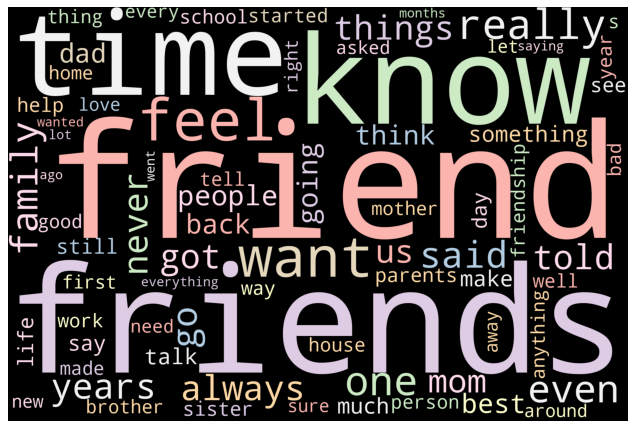

In [10]:
plot_cloud(non_dep_one_wordcloud) #unigram non-depressed

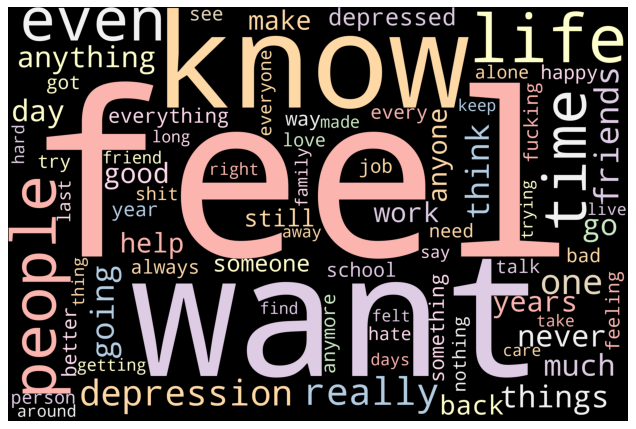

In [11]:
plot_cloud(dep_one_wordcloud) #unigram depressed

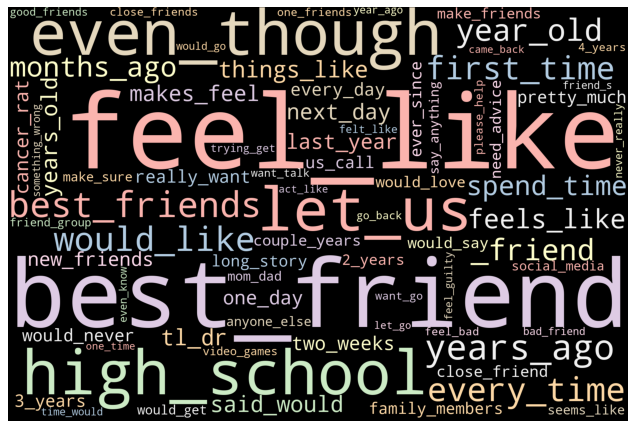

In [12]:
plot_cloud(non_dep_bi_wordcloud) #bigram non-depressed

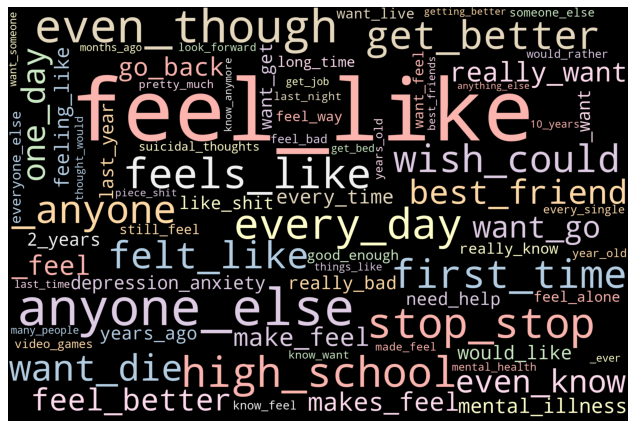

In [13]:
plot_cloud(dep_bi_wordcloud) #bigram depressed

In [14]:
dep_processed_data[0:5]

['another night another night feeling lonely wondering wrong life deserve unhappiness never felt pain stronger rejected love life person gives purpose person supposed make everything better would give life person love anywhere near ',
 'possible fake depression feeling bad 7 months periods cry daily basis never feel like talking struggle concentrating collecting thoughts feel extreme sadness inside also happy situations exhausted time even sleep 10 hours straight often headaches completely alone find difficult anything nights unbearable think situation completely alone failing anything weak handle feelings feel guilt everything happens around carry anymore always dark place feel right like used self harm still many scars skin think disrespectful truly struggle promised cut never right life void void get energy anything ever get pleasure used love nothing seems make feel something good enjoy series book videogame like used think even deserve eat trying pity giving depression  possible f

In [15]:
import pandas as pd
d = {'text': dep_processed_data + non_dep_processed_data,
     'class': [1 for i in range(len(dep_processed_data))] + [0 for i in range(len(non_dep_processed_data))]}
df = pd.DataFrame(data=d)
df.head()

,text,class
0,another night another night feeling lonely won...,1
1,possible fake depression feeling bad 7 months ...,1
2,imagine attractive imagine would like desired ...,1
3,sometimes regret killing life pointless matter...,1
4,best moment anxiety 330am tired want get early...,1


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
# corpus = ['this is the first document', 'this document is the second document', 'and this is the third one', 'is this the first document']
# print(set(corpus))
corpus = df["text"]
# vocabulary = ['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one']
pipe = Pipeline([('count', CountVectorizer(ngram_range=(1, 2), max_features=6000)),
                 ('tfid', TfidfTransformer())]).fit(corpus)
print(pipe['count'].transform(corpus).toarray().shape)
print(pipe['tfid'].idf_)
print(pipe.transform(corpus).shape)

(1841, 6000)
[4.11188797 6.43916568 5.05287131 ... 6.43916568 6.32138264 6.21602212]
(1841, 6000)


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["class"], stratify=df["class"], random_state=1)

In [18]:
pipe = Pipeline([('count', CountVectorizer(ngram_range=(1, 2), max_features=6000)),
                 ('tfid', TfidfTransformer())])
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train_transformed, y_train)
print("Accuracy", clf.score(X_test_transformed, y_test))
print("Precision", precision_score(y_test, clf.predict(X_test_transformed)))
print("Recall", recall_score(y_test, clf.predict(X_test_transformed)))
print("F1", f1_score(y_test, clf.predict(X_test_transformed)))

Accuracy 0.9023861171366594
Precision 0.9292307692307692
Recall 0.9320987654320988
F1 0.9306625577812019


In [20]:
from sklearn.svm import LinearSVC

linear_clf = LinearSVC(random_state=1, tol=1e-5).fit(X_train_transformed, y_train)
print("Accuracy", linear_clf.score(X_test_transformed, y_test))
print("Precision", precision_score(y_test, linear_clf.predict(X_test_transformed)))
print("Recall", recall_score(y_test, linear_clf.predict(X_test_transformed)))
print("F1", f1_score(y_test, linear_clf.predict(X_test_transformed)))

Accuracy 0.9067245119305857
Precision 0.9194029850746268
Recall 0.9506172839506173
F1 0.9347496206373292


In [21]:
dir(pipe.named_steps["count"])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',

In [22]:
dir(pipe.named_steps["tfid"])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_idf_diag',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'idf_',
 'n_features_in_',
 'norm',
 'set_params',
 'smooth_idf',
 'sublinear_tf',
 'transform',
 'use_idf']

In [23]:
coefs = linear_clf.coef_
coefs.tolist()

feature_names = pipe.named_steps["count"].get_feature_names()
coefs_and_features = list(zip(coefs[0], feature_names))
# Most positive features
sorted(coefs_and_features, key=lambda x: x[0], reverse=True)
# Most negative features
sorted(coefs_and_features, key=lambda x: x[0])
# Most predictive overall
sorted(coefs_and_features, key=lambda x: abs(x[0]), reverse=True)

/home/athinnyun/miniconda3/envs/cs7643-a2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(-2.546264062126515, 'friend'),
 (2.5424176171188684, 'depression'),
 (-2.30336422206652, 'friendship'),
 (-1.8704247522676678, 'family'),
 (-1.472734507362585, 'said'),
 (1.405100430863684, 'depressed'),
 (1.4044721418583421, 'life'),
 (-1.3102360853611976, 'friends'),
 (-1.2684822316566122, 'dad'),
 (-1.197912177737744, 'mom'),
 (-1.19375508122097, 'father'),
 (-1.193145251171145, 'phone'),
 (-1.1407847608720594, 'brother'),
 (-1.1358473956962134, 'sister'),
 (-1.1321739909268629, 'us'),
 (1.129916739108081, 'alone'),
 (1.1259025786604855, 'birthday'),
 (-1.1045896520233076, 'friendships'),
 (1.0964020349096553, 'people'),
 (-1.0634127840146879, 'new'),
 (1.0526216302698774, 'feel like'),
 (-1.0475596040900128, 'kids'),
 (1.0347699085383353, 'anyone'),
 (-1.030126992076866, 'saying'),
 (-0.9962000817404142, 'also'),
 (-0.9851097337473858, 'hello'),
 (0.9793328514851148, 'fuck'),
 (0.9712674293288553, 'hate'),
 (0.9535134689361106, 'ever'),
 (0.9311981648488526, 'feel'),
 (-0.9171373

In [24]:
# Most positive features
sorted(coefs_and_features, key=lambda x: x[0], reverse=True)[0:10]

[(2.5424176171188684, 'depression'),
 (1.405100430863684, 'depressed'),
 (1.4044721418583421, 'life'),
 (1.129916739108081, 'alone'),
 (1.1259025786604855, 'birthday'),
 (1.0964020349096553, 'people'),
 (1.0526216302698774, 'feel like'),
 (1.0347699085383353, 'anyone'),
 (0.9793328514851148, 'fuck'),
 (0.9712674293288553, 'hate')]

In [25]:
# Most negative features
sorted(coefs_and_features, key=lambda x: x[0])[0:10]

[(-2.546264062126515, 'friend'),
 (-2.30336422206652, 'friendship'),
 (-1.8704247522676678, 'family'),
 (-1.472734507362585, 'said'),
 (-1.3102360853611976, 'friends'),
 (-1.2684822316566122, 'dad'),
 (-1.197912177737744, 'mom'),
 (-1.19375508122097, 'father'),
 (-1.193145251171145, 'phone'),
 (-1.1407847608720594, 'brother')]

In [26]:
# Most predictive overall
sorted(coefs_and_features, key=lambda x: abs(x[0]), reverse=True)[0:10]

[(-2.546264062126515, 'friend'),
 (2.5424176171188684, 'depression'),
 (-2.30336422206652, 'friendship'),
 (-1.8704247522676678, 'family'),
 (-1.472734507362585, 'said'),
 (1.405100430863684, 'depressed'),
 (1.4044721418583421, 'life'),
 (-1.3102360853611976, 'friends'),
 (-1.2684822316566122, 'dad'),
 (-1.197912177737744, 'mom')]

In [28]:
pipe_uni = Pipeline([('count', CountVectorizer(ngram_range=(1, 1), max_features=6000)),
                 ('tfid', TfidfTransformer())])
X_train_uni = pipe_uni.fit_transform(X_train)
X_test_uni = pipe_uni.transform(X_test)

linear_clf_uni = LinearSVC(random_state=1, tol=1e-5).fit(X_train_uni, y_train)
print("Accuracy", linear_clf_uni.score(X_test_uni, y_test))
print("Precision", precision_score(y_test, linear_clf_uni.predict(X_test_uni)))
print("Recall", recall_score(y_test, linear_clf_uni.predict(X_test_uni)))
print("F1", f1_score(y_test, linear_clf_uni.predict(X_test_uni)))

Accuracy 0.911062906724512
Precision 0.9274924471299094
Recall 0.9475308641975309
F1 0.9374045801526717


In [33]:
coefs = linear_clf_uni.coef_
coefs.tolist()

feature_names = pipe_uni.named_steps["count"].get_feature_names()
coefs_and_features = list(zip(coefs[0], feature_names))
# Most positive features
sorted(coefs_and_features, key=lambda x: x[0], reverse=True)[0:10]

[(2.670787413893716, 'depression'),
 (1.5222396986087736, 'depressed'),
 (1.4442894501552712, 'life'),
 (1.1691333039903606, 'alone'),
 (1.1530305193000723, 'feel'),
 (1.1378596004745587, 'anyone'),
 (1.0719369654944721, 'birthday'),
 (1.060869927812728, 'people'),
 (1.026486057665754, 'hate'),
 (1.0240097492048057, 'ever')]

In [34]:
# Most negative features
sorted(coefs_and_features, key=lambda x: x[0])[0:10]

[(-2.506533855500958, 'friend'),
 (-2.2869358071503036, 'friendship'),
 (-1.8216618205814152, 'family'),
 (-1.4182928082055053, 'said'),
 (-1.388972209321466, 'friends'),
 (-1.219590129479748, 'mom'),
 (-1.2039321287844047, 'phone'),
 (-1.1966440796323854, 'father'),
 (-1.1948319099006215, 'us'),
 (-1.1830349921963554, 'dad')]

In [35]:
# Most predictive overall
sorted(coefs_and_features, key=lambda x: abs(x[0]), reverse=True)[0:10]

[(2.670787413893716, 'depression'),
 (-2.506533855500958, 'friend'),
 (-2.2869358071503036, 'friendship'),
 (-1.8216618205814152, 'family'),
 (1.5222396986087736, 'depressed'),
 (1.4442894501552712, 'life'),
 (-1.4182928082055053, 'said'),
 (-1.388972209321466, 'friends'),
 (-1.219590129479748, 'mom'),
 (-1.2039321287844047, 'phone')]

In [36]:
pipe_bi = Pipeline([('count', CountVectorizer(ngram_range=(2, 2), max_features=6000)),
                 ('tfid', TfidfTransformer())])
X_train_bi = pipe_bi.fit_transform(X_train)
X_test_bi = pipe_bi.transform(X_test)

linear_clf_bi = LinearSVC(random_state=1, tol=1e-5).fit(X_train_bi, y_train)
print("Accuracy", linear_clf_bi.score(X_test_bi, y_test))
print("Precision", precision_score(y_test, linear_clf_bi.predict(X_test_bi)))
print("Recall", recall_score(y_test, linear_clf_bi.predict(X_test_bi)))
print("F1", f1_score(y_test, linear_clf_bi.predict(X_test_bi)))

Accuracy 0.824295010845987
Precision 0.8292682926829268
Recall 0.9444444444444444
F1 0.883116883116883


In [37]:
coefs = linear_clf_bi.coef_
coefs.tolist()

feature_names = pipe_bi.named_steps["count"].get_feature_names()
coefs_and_features = list(zip(coefs[0], feature_names))
# Most positive features
sorted(coefs_and_features, key=lambda x: x[0], reverse=True)[0:10]

/home/athinnyun/miniconda3/envs/cs7643-a2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(1.507753533508144, 'feel like'),
 (1.025050121831731, 'anyone else'),
 (0.9674095584915967, 'want die'),
 (0.9662230197264425, 'wish could'),
 (0.8860696213953732, 'feel better'),
 (0.8725568495618078, 'help get'),
 (0.8317956092228324, 'feel alone'),
 (0.8088814946484236, 'piece shit'),
 (0.7917746869199642, 'want get'),
 (0.7670634842854109, 'makes want')]

In [38]:
# Most negative features
sorted(coefs_and_features, key=lambda x: x[0])[0:10]

[(-1.5487224577814795, 'best friend'),
 (-1.197392866277155, 'years ago'),
 (-1.1652214171925939, 'family members'),
 (-1.164757033353259, 'please help'),
 (-1.1112889010936247, 'another friend'),
 (-1.075334934247026, 'months ago'),
 (-1.0041090209593033, 'right thing'),
 (-0.9998972992157039, 'hold back'),
 (-0.9934350751846908, 'mom dad'),
 (-0.990311601559368, 'thanks advance')]

In [39]:
# Most predictive overall
sorted(coefs_and_features, key=lambda x: abs(x[0]), reverse=True)[0:10]

[(-1.5487224577814795, 'best friend'),
 (1.507753533508144, 'feel like'),
 (-1.197392866277155, 'years ago'),
 (-1.1652214171925939, 'family members'),
 (-1.164757033353259, 'please help'),
 (-1.1112889010936247, 'another friend'),
 (-1.075334934247026, 'months ago'),
 (1.025050121831731, 'anyone else'),
 (-1.0041090209593033, 'right thing'),
 (-0.9998972992157039, 'hold back')]

In [41]:
pipe_tri = Pipeline([('count', CountVectorizer(ngram_range=(3, 3), max_features=6000)),
                 ('tfid', TfidfTransformer())])
X_train_tri = pipe_tri.fit_transform(X_train)
X_test_tri = pipe_tri.transform(X_test)

linear_clf_tri = LinearSVC(random_state=1, tol=1e-5).fit(X_train_tri, y_train)
print("Accuracy", linear_clf_tri.score(X_test_tri, y_test))
print("Precision", precision_score(y_test, linear_clf_tri.predict(X_test_tri)))
print("Recall", recall_score(y_test, linear_clf_tri.predict(X_test_tri)))
print("F1", f1_score(y_test, linear_clf_tri.predict(X_test_tri)))

Accuracy 0.7158351409978309
Precision 0.7281323877068558
Recall 0.9506172839506173
F1 0.8246318607764391


In [42]:
coefs = linear_clf_tri.coef_
coefs.tolist()

feature_names = pipe_tri.named_steps["count"].get_feature_names()
coefs_and_features = list(zip(coefs[0], feature_names))
# Most positive features
sorted(coefs_and_features, key=lambda x: x[0], reverse=True)[0:10]

/home/athinnyun/miniconda3/envs/cs7643-a2/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[(0.9012410319370884, 'diagnosed depression anxiety'),
 (0.720205628605491, 'anyone else feel'),
 (0.6565604107803042, 'ever feel like'),
 (0.639021039976646, 'put foster care'),
 (0.5938999875849988, 'even feel like'),
 (0.590234597897528, 'still feel like'),
 (0.5896519750761747, 'look mirror see'),
 (0.5844625405353086, 'things get better'),
 (0.5723875789198541, 'making feel like'),
 (0.559334314690873, 'remember last time')]

In [43]:
# Most negative features
sorted(coefs_and_features, key=lambda x: x[0])[0:10]

[(-1.7267988079090117, 'let us call'),
 (-1.1615892939965733, 'make new friends'),
 (-1.1078909989001864, 'one best friends'),
 (-1.0890528807877304, 'never long term'),
 (-1.0881267134700638, 'well months ago'),
 (-1.074840508950344, 'talked behind back'),
 (-1.070291371926405, 'like nothing happened'),
 (-1.0157959873838784, 'sorry long post'),
 (-0.9990985195255672, 'one else talk'),
 (-0.9870842627279303, 'would like someone')]

In [44]:
# Most predictive overall
sorted(coefs_and_features, key=lambda x: abs(x[0]), reverse=True)[0:10]

[(-1.7267988079090117, 'let us call'),
 (-1.1615892939965733, 'make new friends'),
 (-1.1078909989001864, 'one best friends'),
 (-1.0890528807877304, 'never long term'),
 (-1.0881267134700638, 'well months ago'),
 (-1.074840508950344, 'talked behind back'),
 (-1.070291371926405, 'like nothing happened'),
 (-1.0157959873838784, 'sorry long post'),
 (-0.9990985195255672, 'one else talk'),
 (-0.9870842627279303, 'would like someone')]

In [20]:
with open('./corpus.txt', 'w') as fp:
    for text in dep_txt_read:
        fp.write("%s\n" % text)
    for text in non_dep_txt_read:
        fp.write("%s\n" % text)
with open('./labels.txt', 'w') as fp:
    for text in dep_txt_read:
        fp.write("%s\n" % "depressed")
    for text in dep_txt_read:
        fp.write("%s\n" % "not depressed")

In [21]:
from octis.preprocessing.preprocessing import Preprocessing
from octis.dataset.dataset import Dataset
dataset = Dataset()
preprocessor = Preprocessing(vocabulary=None, max_features=None,
                             remove_punctuation=True, punctuation=string.punctuation,
                             lemmatize=True, stopword_list='english',
                             min_chars=1, min_words_docs=0)
dataset = preprocessor.preprocess_dataset(documents_path='corpus.txt', labels_path='labels.txt')
dataset.save('reddit_dataset')

created vocab
9400


In [22]:
dataset.load_custom_dataset_from_folder("./reddit_dataset")

In [23]:
dataset._Dataset__corpus[0:5]

[['tired',
  'tired',
  'lose',
  'care',
  'short',
  'timeframe',
  'father',
  'go',
  'cancer',
  'diagnosis',
  'dead',
  'month',
  'time',
  'span',
  'friend',
  'deserve',
  'deal',
  'isolate',
  'enjoy',
  'shitposte',
  'memeing',
  'pathetic',
  'emo',
  'child',
  'literally',
  'incapable',
  'happy',
  'right',
  'close',
  'friend',
  'unfortunately',
  'ex',
  'gf',
  'hate',
  'bring',
  'talk',
  'pathetic',
  'waste',
  'human',
  'notification',
  'nearly',
  'week',
  'discord',
  'anymore',
  'feel',
  'helpless',
  'tired',
  'physically',
  'mentally',
  'simple',
  'have',
  'raid',
  'wow',
  'anxiety',
  'horrible',
  'deal',
  'currently',
  'constantly',
  'stress',
  'people',
  'find',
  'unhappy',
  'want',
  'like',
  'pathetic',
  'social',
  'thing',
  'anymore',
  'want',
  'play',
  'videogame',
  'stressful',
  'p',
  't',
  'h',
  'e',
  't',
  'c',
  'fix',
  'come',
  'realize',
  'accept',
  'go',
  'happen',
  'know',
  'deserve',
  'happy',

In [24]:
import json
import time
import itertools
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from typing import Mapping, Any, List, Tuple

try:
    from bertopic import BERTopic
except ImportError:
    pass

try:
    from top2vec import Top2Vec
except ImportError:
    pass

try:
    from contextualized_topic_models.models.ctm import CombinedTM
    from contextualized_topic_models.utils.data_preparation import (
        TopicModelDataPreparation,
    )
    import nltk

    nltk.download("stopwords")
    from nltk.corpus import stopwords
except ImportError:
    pass

from octis.models.ETM import ETM
from octis.models.LDA import LDA
from octis.models.NMF import NMF
from octis.models.CTM import CTM
from octis.dataset.dataset import Dataset
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

import gensim
import gensim.corpora as corpora
from gensim.models import ldaseqmodel


class Trainer:
    """Train and evaluate a topic model

    Arguments:
        dataset: The dataset to be used, should be a string and either a
                 dataset found in OCTIS or a custom dataset
        model_name: The name of the topic model to be used:
                        * BERTopic
                        * Top2Vec
                        * CTM_CUSTOM (original package)
                        * ETM (OCTIS)
                        * LDA (OCTIS)
                        * CTM (OCTIS)
                        * NMF (OCTIS)
        params: The parameters of the model to be used
        topk: The top n words in each topic to include
        custom_dataset: Whether a custom dataset is used
        bt_embeddings: Pre-trained embeddings used in BERTopic to speed
                       up training.
        bt_timestamps: Timestamps used in BERTopic for dynamic
                       topic modeling
        bt_nr_bins: Number of bins to create from timestamps in BERTopic
        custom_model: A custom BERTopic or Top2Vec class
        verbose: Control the verbosity of the trainer

    Usage:

    ```python
    from evaluation import Trainer
    dataset, custom = "20NewsGroup", False
    params = {"num_topics": [(i+1)*10 for i in range(5)], "random_state": 42}

    trainer = Trainer(dataset=dataset,
                      model_name="LDA",
                      params=params,
                      custom_dataset=custom,
                      verbose=True)
    ```

    Note that we need to specify whether a custom OCTIS dataset is used.
    Since we use a preprocessed dataset from OCTIS [here](https://github.com/MIND-Lab/OCTIS#available-datasets),
    no custom dataset is used.

    This trainer focused on iterating over all combinations of parameters in `params`.
    In the example above, we iterate over different number of topics.
    """

    def __init__(
        self,
        dataset: str,
        model_name: str,
        params: Mapping[str, Any],
        topk: int = 10,
        custom_dataset: bool = False,
        bt_embeddings: np.ndarray = None,
        bt_timestamps: List[str] = None,
        bt_nr_bins: int = None,
        custom_model=None,
        verbose: bool = True,
    ):
        self.dataset = dataset
        self.custom_dataset = custom_dataset
        self.model = None
        self.model_name = model_name
        self.params = params
        self.topk = topk
        self.timestamps = bt_timestamps
        self.nr_bins = bt_nr_bins
        self.embeddings = bt_embeddings
        self.ctm_preprocessed_docs = None
        self.custom_model = custom_model
        self.verbose = verbose

        # Prepare data and metrics
        self.data = self.get_dataset()
        self.metrics = self.get_metrics()

        # CTM
        self.qt_ctm = None
        self.training_dataset_ctm = None

    def train(self, save: str = False) -> Mapping[str, Any]:
        """Train a topic model

        Arguments:
            save: The name of the file to save it to.
                  It will be saved as a .json in the current
                  working directory

        Usage:

        ```python
        from evaluation import Trainer
        dataset, custom = "20NewsGroup", False
        params = {"num_topics": [(i+1)*10 for i in range(5)], "random_state": 42}

        trainer = Trainer(dataset=dataset,
                        model_name="LDA",
                        params=params,
                        custom_dataset=custom,
                        verbose=True)
        results = trainer.train(save="LDA_results")
        ```
        """

        results = []

        # Loop over all parameters
        params_name = list(self.params.keys())
        params = {
            param: (value if type(value) == list else [value])
            for param, value in self.params.items()
        }
        new_params = list(itertools.product(*params.values()))
        for param_combo in new_params:

            # Train and evaluate model
            params_to_use = {
                param: value for param, value in zip(params_name, param_combo)
            }
            output, computation_time = self._train_tm_model(params_to_use)
            scores = self.evaluate(output)

            # Update results
            result = {
                "Dataset": self.dataset,
                "Dataset Size": len(self.data.get_corpus()),
                "Model": self.model_name,
                "Params": params_to_use,
                "Scores": scores,
                "Computation Time": computation_time,
            }
            results.append(result)

        if save:
            with open(f"{save}.json", "w") as f:
                json.dump(results, f)

            try:
                from google.colab import files

                files.download(f"{save}.json")
            except ImportError:
                pass

        return results

    def _train_tm_model(
        self, params: Mapping[str, Any]
    ) -> Tuple[Mapping[str, Any], float]:
        """Select and train the Topic Model"""
        # Train custom CTM
        if self.model_name == "CTM_CUSTOM":
            if self.qt_ctm is None:
                self._preprocess_ctm()
            return self._train_ctm(params)

        # Train BERTopic
        elif self.model_name == "BERTopic":
            return self._train_bertopic(params)

        # Train Top2Vec
        elif self.model_name == "Top2Vec":
            return self._train_top2vec(params)

        # Train LDAseq
        elif self.model_name == "LDAseq":
            return self._train_ldaseq(params)

        # Train OCTIS model
        octis_models = ["ETM", "LDA", "CTM", "NMF"]
        if self.model_name in octis_models:
            return self._train_octis_model(params)

    def _train_ldaseq(
        self, params: Mapping[str, any]
    ) -> Tuple[Mapping[str, Any], float]:
        """Train LDA seq model"""
        data = self.data.get_corpus()
        docs = [" ".join(words) for words in data]

        df = pd.DataFrame({"Doc": docs, "Timestamp": self.timestamps}).sort_values(
            "Timestamp"
        )
        df["Bins"] = pd.cut(df.Timestamp, bins=params["nr_bins"])
        df["Timestamp"] = df.apply(lambda row: row.Bins.left, 1)
        timestamps = df.groupby("Bins").count().Timestamp.values
        docs = df.Doc.values

        data_words = list(sent_to_words(docs))
        id2word = corpora.Dictionary(data_words)
        corpus = [id2word.doc2bow(text) for text in data_words]

        print(len(corpus), len(self.timestamps), timestamps)

        params["corpus"] = corpus
        params["id2word"] = id2word
        params["time_slice"] = timestamps
        del params["nr_bins"]

        start = time.time()
        ldaseq = ldaseqmodel.LdaSeqModel(**params)
        end = time.time()
        computation_time = end - start

        all_topics = {}
        for i in range(len(timestamps)):
            topics = ldaseq.print_topics(time=i)
            topics = [[word for word, _ in topic][:5] for topic in topics]
            all_topics[i] = {"topics": topics}

        return all_topics, computation_time

    def _train_top2vec(
        self, params: Mapping[str, Any]
    ) -> Tuple[Mapping[str, Any], float]:
        """Train Top2Vec"""
        nr_topics = None
        data = self.data.get_corpus()
        data = [" ".join(words) for words in data]
        params["documents"] = data

        if params.get("nr_topics"):
            nr_topics = params["nr_topics"]
            del params["nr_topics"]

        start = time.time()

        if self.custom_model is not None:
            model = self.custom_model(**params)
        else:
            model = Top2Vec(**params)

        if nr_topics:
            try:
                _ = model.hierarchical_topic_reduction(nr_topics)
                params["reduction"] = True
                params["nr_topics"] = nr_topics
            except:
                params["reduction"] = False
                nr_topics = False

        end = time.time()
        computation_time = float(end - start)

        if nr_topics:
            topic_words, _, _ = model.get_topics(reduced=True)
        else:
            topic_words, _, _ = model.get_topics(reduced=False)

        topics_old = [list(topic[:10]) for topic in topic_words]
        all_words = [word for words in self.data.get_corpus() for word in words]
        topics = []
        for topic in topics_old:
            words = []
            for word in topic:
                if word in all_words:
                    words.append(word)
                else:
                    print(f"error: {word}")
                    words.append(all_words[0])
            topics.append(words)

        if not nr_topics:
            params["nr_topics"] = len(topics)
            params["reduction"] = False

        del params["documents"]
        output_tm = {
            "topics": topics,
        }
        return output_tm, computation_time

    def _train_ctm(self, params) -> Tuple[Mapping[str, Any], float]:
        """Train CTM"""
        params["bow_size"] = len(self.qt_ctm.vocab)
        ctm = CombinedTM(**params)

        start = time.time()
        ctm.fit(self.training_dataset_ctm)
        end = time.time()
        computation_time = float(end - start)

        topics = ctm.get_topics(10)
        topics = [topics[x] for x in topics]

        output_tm = {
            "topics": topics,
        }

        return output_tm, computation_time

    def _preprocess_ctm(self):
        """Preprocess data for CTM"""
        # Prepare docs
        data = self.data.get_corpus()
        docs = [" ".join(words) for words in data]

        # Remove stop words
        stop_words = stopwords.words("english")
        preprocessed_documents = [
            " ".join([x for x in doc.split(" ") if x not in stop_words]).strip()
            for doc in docs
        ]

        # Get vocabulary
        vectorizer = CountVectorizer(
            max_features=2000, token_pattern=r"\b[a-zA-Z]{2,}\b"
        )
        vectorizer.fit_transform(preprocessed_documents)
        vocabulary = set(vectorizer.get_feature_names())

        # Preprocess documents further
        preprocessed_documents = [
            " ".join([w for w in doc.split() if w in vocabulary]).strip()
            for doc in preprocessed_documents
        ]

        # Prepare CTM data
        qt = TopicModelDataPreparation("all-mpnet-base-v2")
        training_dataset = qt.fit(
            text_for_contextual=docs, text_for_bow=preprocessed_documents
        )

        self.qt_ctm = qt
        self.training_dataset_ctm = training_dataset

    def _train_octis_model(
        self, params: Mapping[str, any]
    ) -> Tuple[Mapping[str, Any], float]:
        """Train OCTIS model"""

        if self.model_name == "ETM":
            model = ETM(**params)
            model.use_partitions = False
        elif self.model_name == "LDA":
            model = LDA(**params)
            model.use_partitions = False
        elif self.model_name == "CTM":
            model = CTM(**params)
            model.use_partitions = False
        elif self.model_name == "NMF":
            model = NMF(**params)
            model.use_partitions = False

        start = time.time()
        output_tm = model.train_model(self.data)
        end = time.time()
        computation_time = end - start
        self.model = model
        return output_tm, computation_time

    def _train_bertopic(
        self, params: Mapping[str, any]
    ) -> Tuple[Mapping[str, Any], float]:
        """Train BERTopic model"""
        data = self.data.get_corpus()
        data = [" ".join(words) for words in data]
        params["calculate_probabilities"] = False

        if self.custom_model is not None:
            model = self.custom_model(**params)
        else:
            model = BERTopic(**params)

        start = time.time()
        topics, _ = model.fit_transform(data, self.embeddings)

        # Dynamic Topic Modeling
        if self.timestamps:
            topics_over_time = model.topics_over_time(
                data,
                topics,
                self.timestamps,
                nr_bins=self.nr_bins,
                evolution_tuning=False,
                global_tuning=False,
            )
            unique_timestamps = topics_over_time.Timestamp.unique()
            dtm_topics = {}
            for unique_timestamp in unique_timestamps:
                dtm_topic = topics_over_time.loc[
                    topics_over_time.Timestamp == unique_timestamp, :
                ].sort_values("Frequency", ascending=True)
                dtm_topic = dtm_topic.loc[dtm_topic.Topic != -1, :]
                dtm_topic = [topic.split(", ") for topic in dtm_topic.Words.values]
                dtm_topics[unique_timestamp] = {"topics": dtm_topic}

                all_words = [word for words in self.data.get_corpus() for word in words]

                updated_topics = []
                for topic in dtm_topic:
                    updated_topic = []
                    for word in topic:
                        if word not in all_words:
                            print(word)
                            updated_topic.append(all_words[0])
                        else:
                            updated_topic.append(word)
                    updated_topics.append(updated_topic)

                dtm_topics[unique_timestamp] = {"topics": updated_topics}

            output_tm = dtm_topics

        end = time.time()
        computation_time = float(end - start)

        if not self.timestamps:
            all_words = [word for words in self.data.get_corpus() for word in words]
            bertopic_topics = [
                [
                    vals[0] if vals[0] in all_words else all_words[0]
                    for vals in model.get_topic(i)[:10]
                ]
                for i in range(len(set(topics)) - 1)
            ]

            output_tm = {"topics": bertopic_topics}
        self.model = model
        return output_tm, computation_time

    def evaluate(self, output_tm):
        """Using metrics and output of the topic model, evaluate the topic model"""
        if self.timestamps:
            results = {str(timestamp): {} for timestamp, _ in output_tm.items()}
            for timestamp, topics in output_tm.items():
                self.metrics = self.get_metrics()
                for scorers, _ in self.metrics:
                    for scorer, name in scorers:
                        score = scorer.score(topics)
                        results[str(timestamp)][name] = float(score)

        else:
            # Calculate results
            results = {}
            for scorers, _ in self.metrics:
                for scorer, name in scorers:
                    score = scorer.score(output_tm)
                    results[name] = float(score)

            # Print results
            if self.verbose:
                print("Results")
                print("============")
                for metric, score in results.items():
                    print(f"{metric}: {str(score)}")
                print(" ")

        return results

    def get_dataset(self):
        """Get dataset from OCTIS"""
        data = Dataset()

        if self.custom_dataset:
            data.load_custom_dataset_from_folder(self.dataset)
        else:
            data.fetch_dataset(self.dataset)
        return data

    def get_metrics(self):
        """Prepare evaluation measures using OCTIS"""
        npmi = Coherence(texts=self.data.get_corpus(), topk=self.topk, measure="c_npmi")
        topic_diversity = TopicDiversity(topk=self.topk)

        # Define methods
        coherence = [(npmi, "npmi")]
        diversity = [(topic_diversity, "diversity")]
        metrics = [(coherence, "Coherence"), (diversity, "Diversity")]

        return metrics


def sent_to_words(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence), deacc=True))


In [25]:
dataset_name, custom = "reddit_dataset", True
params = {"num_topics": [(i+1)*10 for i in range(7)], "random_state": 42}

trainer = Trainer(dataset=dataset_name,
                  model_name="LDA",
                  params=params,
                  custom_dataset=custom,
                  verbose=True)

In [26]:
results = trainer.train(save="LDA_results")

Results
npmi: -0.004276111899605426
diversity: 0.2
 
Results
npmi: -0.002783248488996419
diversity: 0.155
 
Results
npmi: -0.0024090505760821796
diversity: 0.12333333333333334
 
Results
npmi: -0.003117288551019165
diversity: 0.11
 
Results
npmi: -0.0021011431667646895
diversity: 0.098
 
Results
npmi: -0.006697721559502567
diversity: 0.10166666666666667
 
Results
npmi: -0.006464505249631955
diversity: 0.08571428571428572
 


In [27]:
print(dir(trainer.model))
# print(trainer.model.trained_model)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_get_topic_document_matrix', '_get_topics_words', 'hyperparameters', 'hyperparameters_info', 'id2word', 'id_corpus', 'info', 'partitioning', 'set_hyperparameters', 'train_model', 'trained_model', 'update_with_test', 'use_partitions']


In [28]:
trainer.model._get_topics_words(topk=4)

[['like', 'feel', 'know', 'people'],
 ['friend', 'know', 'feel', 'like'],
 ['friend', 'want', 'feel', 'get'],
 ['want', 'feel', 'friend', 'depression'],
 ['friend', 'like', 'feel', 'think'],
 ['feel', 'like', 'want', 'know'],
 ['like', 'feel', 'think', 'know'],
 ['like', 'friend', 'want', 'feel'],
 ['year', 'time', 'know', 'life'],
 ['like', 'time', 'friend', 'feel'],
 ['want', 'feel', 'go', 'know'],
 ['feel', 'like', 'time', 'think'],
 ['feel', 'like', 'want', 'think'],
 ['feel', 'year', 'time', 'life'],
 ['friend', 'time', 'feel', 'like'],
 ['like', 'leave', 'shit', 'know'],
 ['like', 'want', 'feel', 'know'],
 ['feel', 'know', 'help', 'thing'],
 ['get', 'feel', 'year', 'time'],
 ['like', 'mom', 'depression', 'friend'],
 ['friend', 'good', 'want', 'know'],
 ['friend', 'talk', 'tell', 'feel'],
 ['know', 'people', 'want', 'time'],
 ['feel', 'want', 'friend', 'know'],
 ['go', 'sister', 'time', 'like'],
 ['friend', 'want', 'feel', 'get'],
 ['like', 'know', 'think', 'want'],
 ['know', 'fri

In [29]:
dataset_name, custom = "reddit_dataset", True
params = {"nr_topics": [(i+1)*10 for i in range(7)]}

trainer = Trainer(dataset=dataset_name,
                  model_name="BERTopic",
                  params=params,
                  custom_dataset=custom,
                  verbose=True)

In [30]:
results = trainer.train(save="BERTopic_results")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Results
npmi: 0.016250503950381186
diversity: 1.0
 
Results
npmi: 0.012697426489698824
diversity: 1.0
 


KeyboardInterrupt: 

In [ ]:
trainer.model.get_topics()

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
topic_model = BERTopic()
topics, probs = topic_model.fit_transform(dep_txt_read + non_dep_txt_read)

In [ ]:
topic_model.get_topic_info()

In [31]:
df

,text,class
0,another night another night feeling lonely won...,1
1,possible fake depression feeling bad 7 months ...,1
2,imagine attractive imagine would like desired ...,1
3,sometimes regret killing life pointless matter...,1
4,best moment anxiety 330am tired want get early...,1
...,...,...
1836,please help friend,0
1837,brother stop fighting daily 18 college 15 high...,0
1838,pissed wife mother law new parents 8 month old...,0
1839,glory hole fun group friends discord welcoming...,0


In [37]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification

from tabulate import tabulate
from tqdm import trange
import random

In [41]:
text = df["text"].values
labels = df["class"].values

In [44]:
tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case = True
    )

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [45]:
def print_rand_sentence():
  '''Displays the tokens and respective IDs of a random text sample'''
  index = random.randint(0, len(text)-1)
  table = np.array([tokenizer.tokenize(text[index]), 
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text[index]))]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence()

╒═══════════════╤═════════════╕
│ Tokens        │   Token IDs │
╞═══════════════╪═════════════╡
│ one           │        2028 │
├───────────────┼─────────────┤
│ believes      │        7164 │
├───────────────┼─────────────┤
│ fantasies     │       21233 │
├───────────────┼─────────────┤
│ lies          │        3658 │
├───────────────┼─────────────┤
│ cope          │       11997 │
├───────────────┼─────────────┤
│ killing       │        4288 │
├───────────────┼─────────────┤
│ believe       │        2903 │
├───────────────┼─────────────┤
│ one           │        2028 │
├───────────────┼─────────────┤
│ day           │        2154 │
├───────────────┼─────────────┤
│ girl          │        2611 │
├───────────────┼─────────────┤
│ like          │        2066 │
├───────────────┼─────────────┤
│ like          │        2066 │
├───────────────┼─────────────┤
│ back          │        2067 │
├───────────────┼─────────────┤
│ believe       │        2903 │
├───────────────┼─────────────┤
│ rec   

In [46]:
token_id = []
attention_masks = []

def preprocessing(input_text, tokenizer):
  '''
  Returns <class transformers.tokenization_utils_base.BatchEncoding> with the following fields:
    - input_ids: list of token ids
    - token_type_ids: list of token type ids
    - attention_mask: list of indices (0,1) specifying which tokens should considered by the model (return_attention_mask = True).
  '''
  return tokenizer.encode_plus(
                        input_text,
                        add_special_tokens = True,
                        max_length = 32,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt'
                   )


for sample in text:
  encoding_dict = preprocessing(sample, tokenizer)
  token_id.append(encoding_dict['input_ids']) 
  attention_masks.append(encoding_dict['attention_mask'])


token_id = torch.cat(token_id, dim = 0)
attention_masks = torch.cat(attention_masks, dim = 0)
labels = torch.tensor(labels)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [47]:
def print_rand_sentence_encoding():
  '''Displays tokens, token IDs and attention mask of a random text sample'''
  index = random.randint(0, len(text) - 1)
  tokens = tokenizer.tokenize(tokenizer.decode(token_id[index]))
  token_ids = [i.numpy() for i in token_id[index]]
  attention = [i.numpy() for i in attention_masks[index]]

  table = np.array([tokens, token_ids, attention]).T
  print(tabulate(table, 
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_rand_sentence_encoding()

╒═══════════╤═════════════╤══════════════════╕
│ Tokens    │   Token IDs │   Attention Mask │
╞═══════════╪═════════════╪══════════════════╡
│ [CLS]     │         101 │                1 │
├───────────┼─────────────┼──────────────────┤
│ beyond    │        3458 │                1 │
├───────────┼─────────────┼──────────────────┤
│ messed    │       18358 │                1 │
├───────────┼─────────────┼──────────────────┤
│ think     │        2228 │                1 │
├───────────┼─────────────┼──────────────────┤
│ kind      │        2785 │                1 │
├───────────┼─────────────┼──────────────────┤
│ need      │        2342 │                1 │
├───────────┼─────────────┼──────────────────┤
│ vent      │       18834 │                1 │
├───────────┼─────────────┼──────────────────┤
│ got       │        2288 │                1 │
├───────────┼─────────────┼──────────────────┤
│ phone     │        3042 │                1 │
├───────────┼─────────────┼──────────────────┤
│ call      │

In [48]:
val_ratio = 0.2
# Recommended batch size: 16, 32. See: https://arxiv.org/pdf/1810.04805.pdf
batch_size = 16

# Indices of the train and validation splits stratified by labels
train_idx, val_idx = train_test_split(
    np.arange(len(labels)),
    test_size = val_ratio,
    shuffle = True,
    stratify = labels)

# Train and validation sets
train_set = TensorDataset(token_id[train_idx], 
                          attention_masks[train_idx], 
                          labels[train_idx])

val_set = TensorDataset(token_id[val_idx], 
                        attention_masks[val_idx], 
                        labels[val_idx])

# Prepare DataLoader
train_dataloader = DataLoader(
            train_set,
            sampler = RandomSampler(train_set),
            batch_size = batch_size
        )

validation_dataloader = DataLoader(
            val_set,
            sampler = SequentialSampler(val_set),
            batch_size = batch_size
        )

In [49]:
def b_tp(preds, labels):
  '''Returns True Positives (TP): count of correct predictions of actual class 1'''
  return sum([preds == labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_fp(preds, labels):
  '''Returns False Positives (FP): count of wrong predictions of actual class 1'''
  return sum([preds != labels and preds == 1 for preds, labels in zip(preds, labels)])

def b_tn(preds, labels):
  '''Returns True Negatives (TN): count of correct predictions of actual class 0'''
  return sum([preds == labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_fn(preds, labels):
  '''Returns False Negatives (FN): count of wrong predictions of actual class 0'''
  return sum([preds != labels and preds == 0 for preds, labels in zip(preds, labels)])

def b_metrics(preds, labels):
  '''
  Returns the following metrics:
    - accuracy    = (TP + TN) / N
    - precision   = TP / (TP + FP)
    - recall      = TP / (TP + FN)
    - specificity = TN / (TN + FP)
  '''
  preds = np.argmax(preds, axis = 1).flatten()
  labels = labels.flatten()
  tp = b_tp(preds, labels)
  tn = b_tn(preds, labels)
  fp = b_fp(preds, labels)
  fn = b_fn(preds, labels)
  b_accuracy = (tp + tn) / len(labels)
  b_precision = tp / (tp + fp) if (tp + fp) > 0 else 'nan'
  b_recall = tp / (tp + fn) if (tp + fn) > 0 else 'nan'
  b_specificity = tn / (tn + fp) if (tn + fp) > 0 else 'nan'
  return b_accuracy, b_precision, b_recall, b_specificity

In [50]:
# Load the BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels = 2,
    output_attentions = False,
    output_hidden_states = False,
)

# Recommended learning rates (Adam): 5e-5, 3e-5, 2e-5. See: https://arxiv.org/pdf/1810.04805.pdf
optimizer = torch.optim.AdamW(model.parameters(), 
                              lr = 5e-5,
                              eps = 1e-08
                              )


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Recommended number of epochs: 2, 3, 4. See: https://arxiv.org/pdf/1810.04805.pdf
epochs = 2

for _ in trange(epochs, desc = 'Epoch'):
    
    # ========== Training ==========
    
    # Set model to training mode
    model.train()
    
    # Tracking variables
    tr_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        optimizer.zero_grad()
        # Forward pass
        train_output = model(b_input_ids, 
                             token_type_ids = None, 
                             attention_mask = b_input_mask, 
                             labels = b_labels)
        # Backward pass
        train_output.loss.backward()
        optimizer.step()
        # Update tracking variables
        tr_loss += train_output.loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    # ========== Validation ==========

    # Set model to evaluation mode
    model.eval()

    # Tracking variables 
    val_accuracy = []
    val_precision = []
    val_recall = []
    val_specificity = []

    for batch in validation_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
          # Forward pass
          eval_output = model(b_input_ids, 
                              token_type_ids = None, 
                              attention_mask = b_input_mask)
        logits = eval_output.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # Calculate validation metrics
        b_accuracy, b_precision, b_recall, b_specificity = b_metrics(logits, label_ids)
        val_accuracy.append(b_accuracy)
        # Update precision only when (tp + fp) !=0; ignore nan
        if b_precision != 'nan': val_precision.append(b_precision)
        # Update recall only when (tp + fn) !=0; ignore nan
        if b_recall != 'nan': val_recall.append(b_recall)
        # Update specificity only when (tn + fp) !=0; ignore nan
        if b_specificity != 'nan': val_specificity.append(b_specificity)

    print('\n\t - Train loss: {:.4f}'.format(tr_loss / nb_tr_steps))
    print('\t - Validation Accuracy: {:.4f}'.format(sum(val_accuracy)/len(val_accuracy)))
    print('\t - Validation Precision: {:.4f}'.format(sum(val_precision)/len(val_precision)) if len(val_precision)>0 else '\t - Validation Precision: NaN')
    print('\t - Validation Recall: {:.4f}'.format(sum(val_recall)/len(val_recall)) if len(val_recall)>0 else '\t - Validation Recall: NaN')
    print('\t - Validation Specificity: {:.4f}\n'.format(sum(val_specificity)/len(val_specificity)) if len(val_specificity)>0 else '\t - Validation Specificity: NaN')

Epoch:  50%|██████████████████████████████████████▌                                      | 1/2 [07:05<07:05, 425.42s/it]


	 - Train loss: 0.3250
	 - Validation Accuracy: 0.9167
	 - Validation Precision: 0.9548
	 - Validation Recall: 0.9238
	 - Validation Specificity: 0.8724



Epoch: 100%|█████████████████████████████████████████████████████████████████████████████| 2/2 [13:55<00:00, 417.57s/it]


	 - Train loss: 0.1377
	 - Validation Accuracy: 0.9323
	 - Validation Precision: 0.9702
	 - Validation Recall: 0.9313
	 - Validation Specificity: 0.9155

